# Plotting some NZESM data in a Jupyter notebook

Import your modules

In [1]:
import cartopy.crs as ccrs
import matplotlib
import matplotlib.pyplot as plt
import iris
import iris.plot as iplt
import iris.quickplot as qplt
import numpy as np
import datetime
from iris.time import PartialDateTime
import iris.analysis

The following renders graphics inside the Jupyter document

In [2]:
%matplotlib inline

Increase font size for graphics

In [3]:
matplotlib.rcParams['font.size'] = 24

/home/mooresa/anaconda/lib/python2.7/site-packages/iris/fileformats/_ff.py:732: UserWarning: The STASH code m01s00i194 was not found in the STASH to grid type mapping. Picking the P position as the cell type
  'position as the cell type'.format(stash))
/home/mooresa/anaconda/lib/python2.7/site-packages/iris/fileformats/_ff.py:732: UserWarning: The STASH code m01s00i428 was not found in the STASH to grid type mapping. Picking the P position as the cell type
  'position as the cell type'.format(stash))
/home/mooresa/anaconda/lib/python2.7/site-packages/iris/fileformats/_ff.py:732: UserWarning: The STASH code m01s00i429 was not found in the STASH to grid type mapping. Picking the P position as the cell type
  'position as the cell type'.format(stash))
/home/mooresa/anaconda/lib/python2.7/site-packages/iris/fileformats/_ff.py:732: UserWarning: The STASH code m01s03i365 was not found in the STASH to grid type mapping. Picking the P position as the cell type
  'position as the cell type'.for

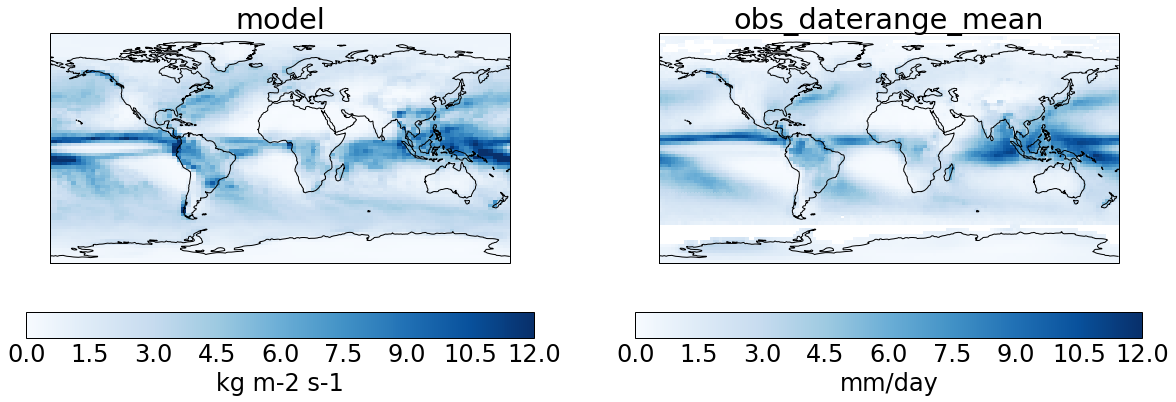

In [4]:
# Define string arrays
dirnames = np.array(['u-ac926'])
fnames = np.array(['ac926'])
varnames = np.array(['air_temperature','precipitation_flux'])

vmins=np.array([240,0])
vmindiffs=np.array([-1,-1])
vmaxs=np.array([310,12])
vmaxdiffs=np.array([1,1])

for j in range(1,len(varnames)):# loop over different variables

    fname = '/home/williamsjh/cylc-run/'+dirnames[0]+'/share/data/History_Data/'+fnames[0]+'a.py19791201'

    cube_all = iris.load(fname, varnames[j])
    cube=cube_all[0] 
    
    u = iris.load(fname, 'eastward_wind')
     
    if j == 0:#air temperature
        cmap = 'RdBu_r'

    if j > 0:#precip
        cmap = 'RdBu'
        cube.data = cube.data * 86400.
        cmap = 'Blues'
        obs_all=iris.load_cube('/hpcf/data/williamsjh/obs/cmap/precip.mon.mean.nc')    
        
        # Examples from
        # http://scitools.org.uk/iris/docs/latest/userguide/loading_iris_cubes.html#constraining-on-time
        ###########################################################################    
        
        month_9 = iris.Constraint(time=lambda cell : cell.point.month == 9)
        with iris.FUTURE.context(cell_datetime_objects=True):
            obs_9 = obs_all.extract(month_9)
            
        ###########################################################################     
        
        dt = datetime.datetime(1979, 9, 1)    
        #print(dt > PartialDateTime(year=1979, month=10))
        #print(dt > PartialDateTime(year=1979, month=8))
        
        ###########################################################################     
        
        the_9th_month = iris.Constraint(time=iris.time.PartialDateTime(month=9))
        with iris.FUTURE.context(cell_datetime_objects=True):
            #print(iris.load_cube(
            #   '/hpcf/data/williamsjh/obs/cmap/precip.mon.mean.nc',
            #    the_9th_month).coord('time'))
           
            obs_the_9th_month=iris.load_cube('/hpcf/data/williamsjh/obs/cmap/precip.mon.mean.nc',the_9th_month)
            #print(obs_the_9th_month.coord('time'))
            
        ###########################################################################            
        
        #print(obs_all.coord('time'))
    
        ###########################################################################
            
        daterange = iris.Constraint(
            time=lambda cell: PartialDateTime(year=1979, month=9) <= cell < PartialDateTime(year=1989, month=9))
        with iris.FUTURE.context(cell_datetime_objects=True):
            obs_daterange = obs_all.extract(daterange)
   
        #print(obs_daterange.coord('time'))
    
        obs_daterange_mean = obs_daterange.collapsed('time',iris.analysis.MEAN)
    
    grid = iris.load_cube(iris.sample_data_path('air_temp.pp'))
    
    plotthis = cube
    vmin = vmins[j]
    vmax = vmaxs[j] 
    lat=cube.coord('latitude').points
    lon=cube.coord('longitude').points
    lonplot,latplot=np.meshgrid(lon,lat)
 
    
    fig = plt.figure(figsize=(20,20))
    plt.subplot(3,2,1)
    qplt.pcolormesh(plotthis.regrid(grid,iris.analysis.Linear()), cmap=cmap, vmin=vmin, vmax=vmax)
    plt.gca().coastlines()
    
    plt.title('model')
    
plt.subplot(3,2,2)    
#fig = plt.figure(figsize=(10,10))
#qplt.pcolormesh(obs_daterange_mean.regrid(cube,iris.analysis.Linear()), cmap=cmap, vmin=vmin, vmax=vmax)
qplt.pcolormesh(obs_daterange_mean, cmap=cmap, vmin=vmin, vmax=vmax)

plt.title('obs_daterange_mean')

plt.gca().coastlines()

iplt.show()